### Baseline Model

**Instantiating a small convnet for dogs vs. cats classification**

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

import os, shutil, pathlib

new_base_dir = pathlib.Path("cats_vs_dogs_small")


inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [154]:
model.summary()

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_55 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_55 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_176 (Conv2D)             │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_143               │ (None, 89, 89, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_177 (Conv2D)             │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_144               │ (None, 43, 43, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_178 (Conv2D)             │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 215168)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1)              │       215,169 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,417 (1.18 MB)

 Trainable params: 308,417 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [155]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [8]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [158]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [159]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [160]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [161]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [162]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5007 - loss: 1.9075 - val_accuracy: 0.6120 - val_loss: 0.6889
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5393 - loss: 0.7444 - val_accuracy: 0.6270 - val_loss: 0.6604
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6163 - loss: 0.6836 - val_accuracy: 0.5730 - val_loss: 0.6725
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6703 - loss: 0.6115 - val_accuracy: 0.5930 - val_loss: 0.6800
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7116 - loss: 0.5509 - val_accuracy: 0.6820 - val_loss: 0.6054
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7747 - loss: 0.4842 - val_accuracy: 0.5740 - val_loss: 1.2998
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7877 - loss: 0.4603 - val_accuracy: 0.6910 - val_loss: 0.7012
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8487 - loss: 0.3465 - val_accuracy: 0.6820 - v

**Displaying curves of loss and accuracy during training**

In [9]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

**Evaluating the model on the test set**

In [164]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6631 - loss: 0.6199
Test accuracy: 0.665


## Your Models Below

### Model 1: Changing Kernel Sizes, Increase Batch Size to 128

In [65]:
## Purpose: The goal of changing kernel sizes would be to hopefully capture larger patterns to boost performance.

new_base_dir = pathlib.Path("cats_vs_dogs_small")



inputs = keras.Input(shape=(180,180, 3)) # each image is 180 x 180 pixels in RGB
x = layers.Rescaling(1./255)(inputs) # Rescale and normalize pixels

x = layers.Conv2D(filters=32, kernel_size=7, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=7, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=7, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_13 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 174, 174, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 87, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 81, 81, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 34, 34, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │        36,993 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 543,681 (2.07 MB)

 Trainable params: 543,681 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=128) #Changning the batch size. Batch size determines how many images a model sees at once. By increasing to 128, this is saying each epoch will have ~16 samples to run through, with each sample getting 128 images.
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=64) # We don't want to change the others.
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=64)

import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
batched_dataset = dataset.batch(256)
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [68]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 489ms/step - accuracy: 0.5038 - loss: 1.5864 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4954 - loss: 0.6935 - val_accuracy: 0.5390 - val_loss: 0.6914
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5017 - loss: 0.6937 - val_accuracy: 0.5110 - val_loss: 0.6926
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5073 - loss: 0.6931 - val_accuracy: 0.5580 - val_loss: 0.6913
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5369 - loss: 0.6963 - val_accuracy: 0.5880 - val_loss: 0.6903
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5459 - loss: 0.6997 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5262 - loss: 0.6922 - val_accuracy: 0.6090 - val_loss: 0.6799
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5636 - loss: 0.7134 - val_accuracy: 0.5730 -

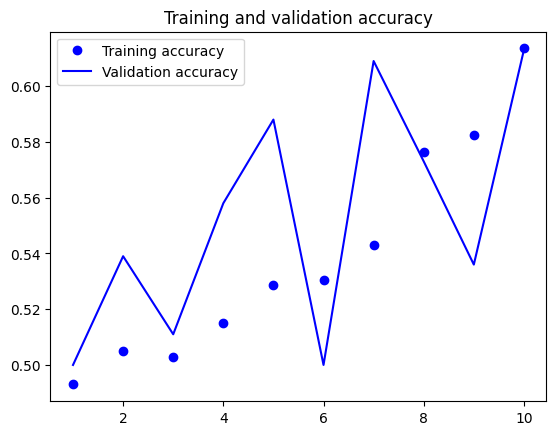

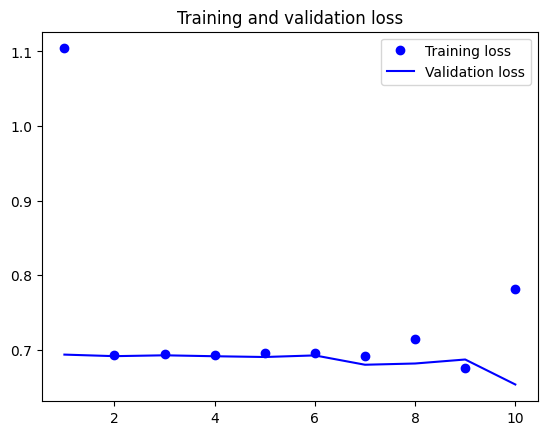

In [69]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [70]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6003 - loss: 0.6561
Test accuracy: 0.610


#### Model 1 Rationalization: The idea behind changing batch sizes is to expose the data to more/less images in one batch. This, in theory would help a model learn from a larger sample size per epoch, but in this case it had a negative impact on the model. Something is clearly missing from this implementation to boost success.

### Model 2: More Filters, More Layers, a Dropout Layer, More Epochs, and Global Average Pooling

In [ ]:
#Regularization is a great way to boost model performance, so a dropout layer is added.

inputs = keras.Input(shape=(180,180, 3)) # each image is 180 x 180 pixels in RGB
x = layers.Rescaling(1./255)(inputs) # Rescale and normalize pixels

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x) # Due to pooling size, we can only add one more layer, but we can change the number of neurons to strengthen the network.
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.GlobalAveragePooling2D()(x) # The layers.Flatten() function simply squashes down the 2D dataframe into one dimension, which can potentially cause the loss of some features. This function instead takes the average of the pool to preserve important features, which would lead to better performance.
x = layers.Dense(256, activation="relu")(x) # Here, we add deep layers to the CNN to boost performance. After squashing the dataframe, we can use deep layers to perform analysis on the data.
x = layers.Dense(128, activation="relu")(x) # I found for some reason that matching the neurons in reverse order worked best to find the most important features.
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x) # The dropout layer is a regularization technique where random neurons are deactivated in an epoch, leading to different features being present across all epochs. This can help boost generalizability by making sure specific neurons are not weighted more heavily.
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_75 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_75 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_246 (Conv2D)             │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_212               │ (None, 89, 89, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_247 (Conv2D)             │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_213               │ (None, 43, 43, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_248 (Conv2D)             │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_214               │ (None, 20, 20, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_249 (Conv2D)             │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_215               │ (None, 9, 9, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_40     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,425 (1.89 MB)

 Trainable params: 495,425 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [261]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=16)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=16)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=16)

import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
batched_dataset = dataset.batch(128)
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="CNN2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30, # We use 30 epochs to provide more training. Ultimately after 30, the results began to decline, so 30 seemed to be a good limit.
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4978 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4946 - loss: 0.6939 - val_accuracy: 0.5030 - val_loss: 0.6928
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ -1s -11171us/step - accuracy: 0.4840 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5097 - loss: 0.6922 - val_accuracy: 0.5920 - val_loss: 0.6840
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5649 - loss: 0.6826 - val_accuracy: 0.5040 - val_loss: 0.6877
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5899 - loss: 0.6708 - val_accuracy: 0.6560 - val_loss: 0.6384
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6165 - loss: 0.6561 - val_accuracy: 0.6830 - val_loss: 0.6085
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6322 - loss: 0.6450 - val

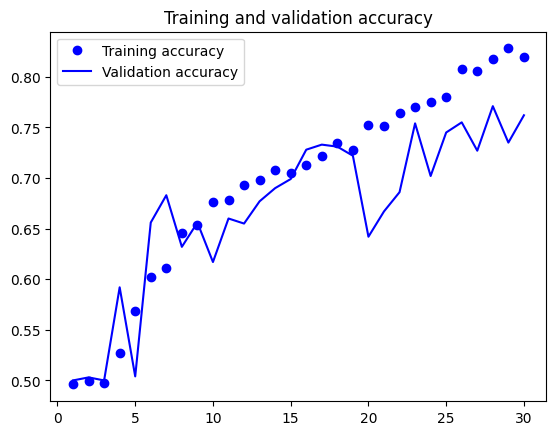

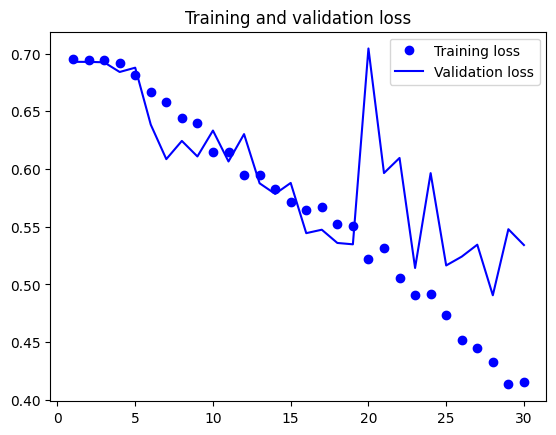

In [264]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [265]:
test_model = keras.models.load_model("CNN2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7687 - loss: 0.4781
Test accuracy: 0.762


### Model 3: Adding Augmentation, and Applying previous model methods to the third.

In [ ]:

data_augmentation = keras.Sequential([ # Data augmentation is applying some transformation to data to produce new, synthetic data. The idea is to generate more training data than what is provided to boost performance. 
    layers.RandomFlip("horizontal"),          # Randomly flip images
    layers.RandomRotation(0.2),               # Rotate images by up to 20%
])

inputs = keras.Input(shape=(180,180, 3)) # each image is 180 x 180 pixels in RGB
x = layers.Rescaling(1./255)(inputs) # Rescale and normalize pixels
x = data_augmentation(inputs) # We add a layer for data augmentation within the model itself so when each data element is analyzed, augmented data is produced to add to the total number of training data.
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x) 

x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x) # We add more layers to boost the depth of the CNN.
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.GlobalAveragePooling2D()(x) # Results were better with GlobalAveragePooling() so we will keep it.

x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_11 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 45, 45, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,889 (616.75 KB)

 Trainable params: 157,889 (616.75 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=128)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


import numpy as np
import tensorflow as tf


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="CNN3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20, # Increase Epochs to boost performance
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.5268 - loss: 2.1789 - val_accuracy: 0.5230 - val_loss: 0.6916
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.4966 - loss: 0.7040 - val_accuracy: 0.5130 - val_loss: 0.6911
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5060 - loss: 0.6945 - val_accuracy: 0.5030 - val_loss: 0.6915
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5239 - loss: 0.6999 - val_accuracy: 0.5320 - val_loss: 0.6936
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5306 - loss: 0.6943 - val_accuracy: 0.5030 - val_loss: 0.6905
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5127 - loss: 0.6906 - val_accuracy: 0.5500 - val_loss: 0.6723
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5287 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5145 - loss: 0.6994 - val_accuracy: 0.5110 - 

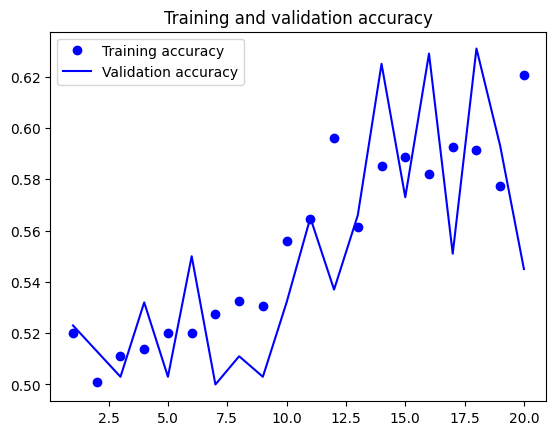

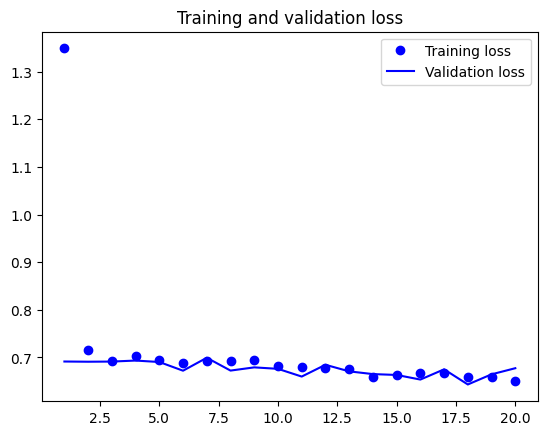

In [75]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [76]:
test_model = keras.models.load_model("CNN3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6079 - loss: 0.6460
Test accuracy: 0.616


# Last Cell Final Thoughts

## Which of your models performed the best?
### The best modelf for me was Model 2.

## What approach did you take that contributed to success of this model performance?
### The approach I took was to try and focus on stopping overfitting from happening via regularization and using global average pooling. These methods ensured better generalizability while also keeping the most important features intact.

## What was the overall test accuracy of this model?
### 76.2%